# Lab 6
Noah Kim Section AC

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import random
plt.rcParams["figure.figsize"] = (10,6)

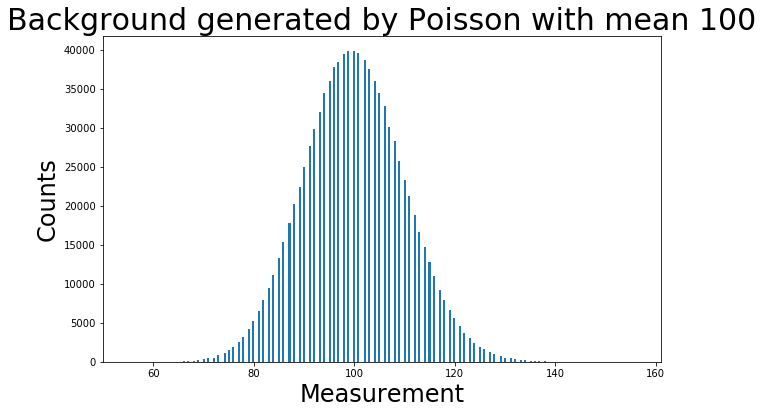

In [2]:
#Generating the random data in a poisson distribution
size = 1000000
poisson_dist = stats.poisson.rvs(100,size=size)
plt.hist(poisson_dist,bins=250)
plt.ylabel("Counts", fontsize = '24')
plt.xlabel("Measurement", fontsize = '24')
plt.title("Background generated by Poisson with mean 100", fontsize = '30')
plt.show()

## Problem 1
Determining the $5\sigma$ sensitivity threshold of my Poisson background.

In [3]:
prob = stats.norm.sf(5)
thresh = stats.poisson.isf(prob,100)
print(thresh)

154.0


## Problem 2
Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30σ range. Inject this signal into your background data many times.

I decided to inject a signal with the value of 250 (I need to inject only 250 not a Poisson distribution so an array of only 250) which falls between the 8-30$\sigma$ range. In order to do that I needed a signal to also count the number of particle events but instead of being centered around 100, I set the mean for the injected signal at 250.

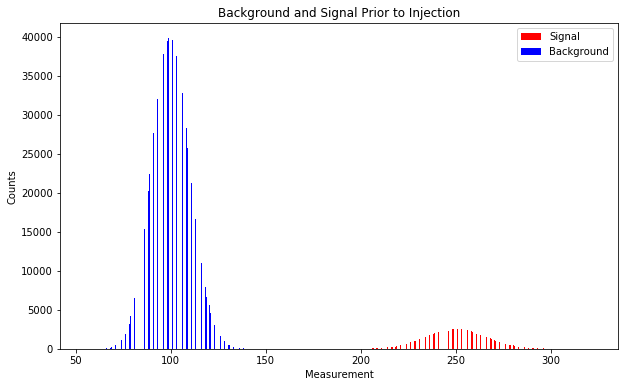

In [4]:
signal_mean = 250
signal = stats.poisson.rvs(signal_mean,size=100000)
plt.hist([signal, poisson_dist], bins = 400, color=['red','blue'],label=['Signal', 'Background'])
plt.title("Background and Signal Prior to Injection")
plt.xlabel("Measurement")
plt.ylabel("Counts")
plt.legend()
plt.show()

Our background signal centered at 100 and our signal we are going to inject centered around 250 are plotted above. The signals do not overlap and we see that the signal is also going to be Poisson. 

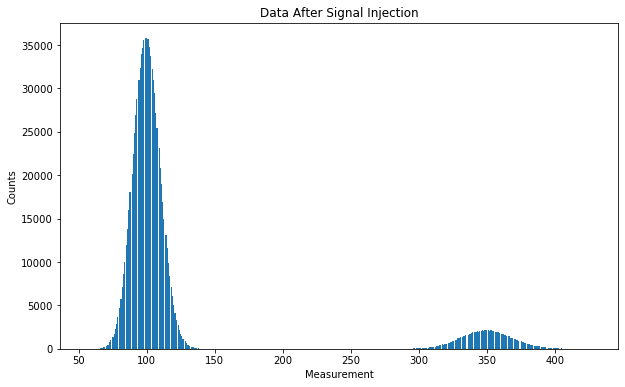

In [5]:
bkgd = poisson_dist;

signal_injected = np.zeros(bkgd.size)
for i in range(signal_injected.size):
    if i < signal.size:
        signal_injected[i] = np.add(bkgd[i], signal[i])
    else:
        signal_injected[i] = bkgd[i]

plt.hist(signal_injected,bins = 450)
plt.title('Data After Signal Injection')
plt.xlabel('Measurement')
plt.ylabel('Counts')
plt.show()

The observed signal has a shape of a typical poisson distribution. This makes sense because we randomly picked points from the dataset that is poisson-distributed. Therefore, the resulting picked set of data is also a poisson distribution. Also, this tells that the observed signal is not a single number but a range of values even though we injected a singal signal strength.

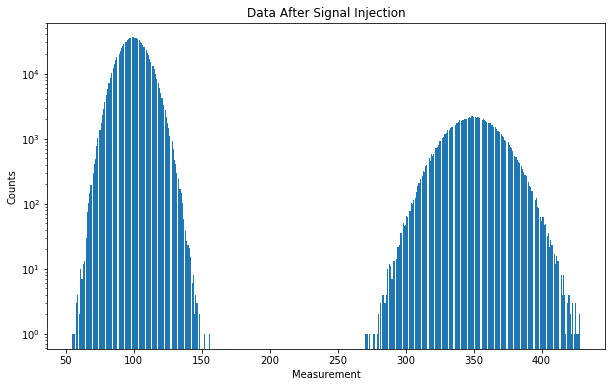

In [6]:
plt.hist(signal_injected,bins = 450)
plt.title('Data After Signal Injection')
plt.xlabel('Measurement')
plt.ylabel('Counts')
plt.yscale('log')
plt.show()

From the plots above, we can see that the mean shifted for the injected signal from 250 to 350. The signal has moved by exactly 100 which is the mean of our background Poisson created at the start of the lab. We see this pattern because on average the background will produce 100 particle events and the signal on average will produce 250 particle events and these two events are independent of each other. So when both of these events occur at the same time the overall observed particles in an average signal event will take into account the background and will be the sum of the particles from the background + the particles from the signal being 250 + 100 = 350. This makes sense because our mean has moved 100 units to the right from the signal from 250 -> 350. The distribution maintains as a Poisson distribution because the sum of Poisson distributions is going to be a Poisson distribution. Even though it is a Poisson distribution. Due to the central limit theorem, the signal looks Gaussian because of the sample size I have is quite large so we can assume that the distribution is Gaussian. 



My observed signal biased, we can see on both sides of the injected signal area that we have a probability of getting a range of 275 - 475 but the observed signal is symmetrical.

## Problem 3

What I am going to simulate is a range of injected signals from 0 to 501 (a value well over 30$\sigma$) and creating a 2D histogram of the injected signals and observed signals.

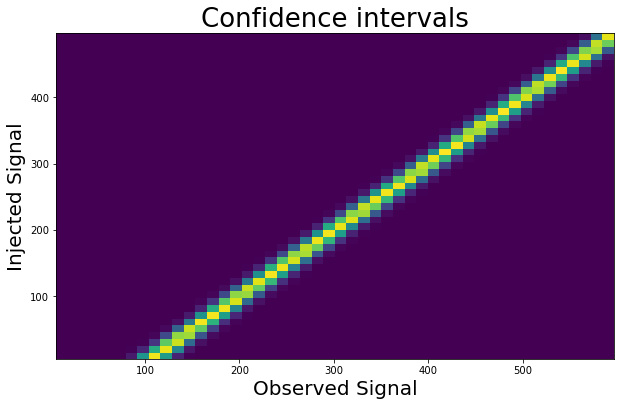

In [17]:
bkgd = poisson_dist;
signal = np.linspace(0,501,size);
observed = bkgd + signal;

signaledges = np.linspace(0,503);
dataedges = np.linspace(0,603);

Psd, temp, temp2= np.histogram2d(observed,signal, bins=[dataedges,signaledges], density=True)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel("Injected Signal", fontsize = "20")
plt.xlabel("Observed Signal", fontsize = "20")
plt.title("Confidence intervals", fontsize = "26")
plt.show()

In [10]:
table = pd.DataFrame(columns = ['Data', 'Background', 'Signal']);
table['Data'] = observed;
table['Signal'] = signal;
table['Background'] = bkgd;

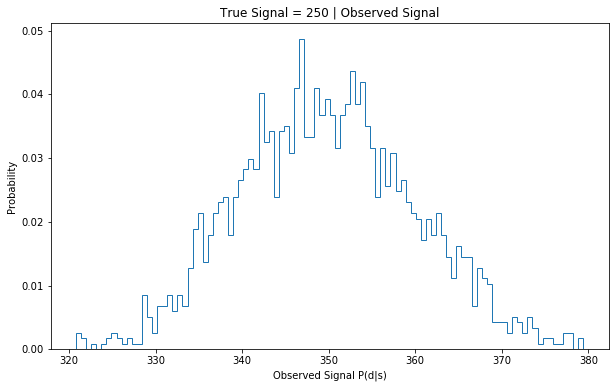

In [11]:
injected = table.query(f'249.5 < Signal < 250.5')
plt.hist(injected['Data'], bins =100, density = True, histtype='step')
plt.xlabel('Observed Signal P(d|s)')
plt.ylabel('Probability')
plt.title('True Signal = 250 | Observed Signal')
plt.show()

As we did in problem 2, when slicing horizontally using the injected signal of 250 we get an observed signal centered around 350.  

Now I am going to reverse what I did above and pick a observed data value and try to find the probability and value the true signal will be for the observed data value. Essentially I want to slice vertically at the given observed data value. For this test I am going to use a observed value of 400.

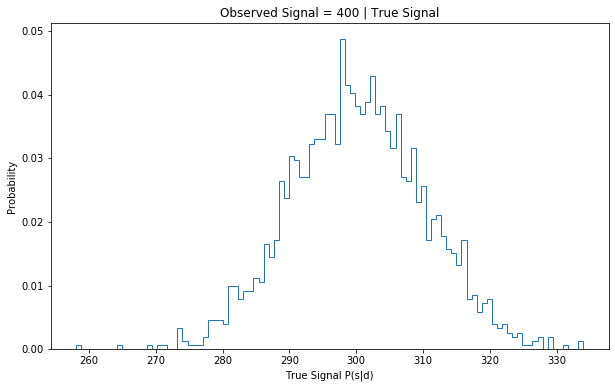

In [12]:
observed = table.query(f'399.5 < Data < 400.5')
plt.hist(observed['Signal'], bins=100, density=True, histtype='step')
plt.xlabel('True Signal P(s|d)')
plt.ylabel('Probability')
plt.title('Observed Signal = 400 | True Signal')
plt.show()

The histogram shows the possible true signal vs. the probability of getting that signal when given a observed signal of 400. For this histogram, we can see that for a given Observed signal we are most likely to see a true signal that is around 300. Which is consistent to what we saw in the previous part and in the 2D histogram.

The 1$\sigma$ uncertainty on the true signal strength will be:

In [34]:
Lprob = stats.norm.cdf(1)
Uprob = stats.norm.sf(1)
Upper = stats.poisson.ppf(Lprob,mu=400)
Lower = stats.poisson.ppf(Uprob,mu=400)
uncertainty = (Upper - Lower) / 2;
print(f"1𝜎 uncertainty that injected signal is between {lower:.1f} and {upper:.1f}")
print(f'The 1𝜎 uncertainty is +/- {uncertainty:.1f}')

1𝜎 uncertainty that injected signal is between 346.0 and 384.0
The 1𝜎 uncertainty is +/- 20.0


Our answer above is symmetric, but is biased to be lower than the observed counts we see. This again makes sense because the observed signal is the combination of true signals and background signals. This makes sense because the background on average counts 100 particles, and when you add that to the true signal value, the observed value will always be biased higher than the true signal because the background is not 0. Again since my distribution is Poisson it should not be symmetrical as the Poisson has a tail towards the right side. However, Our sample looks our distribution looks a lot like a Gaussian distribution. This means our resulting true signal we should roughly expect it to be symmetrical about the mean because of how closely it resembles a Gaussian. 